In [10]:
# !pip install plotly

In [11]:
from pathlib import Path

# Get the current working directory
working_dir = Path.cwd()

# Print the current working directory
print(f"Current working directory: {working_dir}")

# Get the parent directory
data_dir = working_dir / "COSC2779-DATA"

# Data path 
data="/home/ec2-user/SageMaker/studies/COSC2779-DATA/data.zip"

# Unzip the data
import zipfile

with zipfile.ZipFile(data, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# Print the parent directory
print(f"Parent directory: {data_dir}")

Current working directory: /home/ec2-user/SageMaker
Parent directory: /home/ec2-user/SageMaker/COSC2779-DATA


In [12]:
%%bash
ls -la "/home/ec2-user/SageMaker/COSC2779-DATA"

total 95328
drwxrwxr-x 5 ec2-user ec2-user     4096 Aug  6 06:53 .
drwxr-xr-x 7 ec2-user ec2-user     4096 Aug  8 01:57 ..
-rw-rw-r-- 1 ec2-user ec2-user   246290 Aug  8 02:02 dev_data_2025.csv
-rw-rw-r-- 1 ec2-user ec2-user    58285 Aug  8 02:02 future_data_2025.csv
drwxrwxr-x 2 ec2-user ec2-user   339968 Aug  6 06:53 Hematoxylin
drwxrwxr-x 3 ec2-user ec2-user     4096 Aug  6 06:52 Images
-rw-rw-r-- 1 ec2-user ec2-user 96665502 Aug  8 02:02 Images.zip
drwxrwxr-x 2 ec2-user ec2-user     4096 Aug  6 06:50 __MACOSX
-rw-rw-r-- 1 ec2-user ec2-user   275552 Aug  8 02:02 s1234567_predictions.csv


In [13]:
with zipfile.ZipFile(data_dir / "Images.zip", 'r') as zip_ref:
    zip_ref.extractall(data_dir)

In [14]:
%%bash 
ls -1 /home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/*.jpg | shuf -n 10


/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_08610.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_06397.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_07899.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_08140.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_08754.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_01283.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_05828.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_03787.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_05068.jpg
/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_03117.jpg


In [15]:
def quick_count_images():
    """Quick count of all image files"""
    folder = Path(data_dir / "Hematoxylin")
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif', '.webp'}
    
    count = sum(1 for file_path in folder.rglob('*') 
                if file_path.is_file() and file_path.suffix.lower() in image_extensions)
    return count

In [16]:
quick_count_images()

10298

In [ ]:
import os
import pandas as pd

def load_csvs_to_dict(directory):
    csv_dict = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            csv_dict[filename] = df
    return csv_dict


In [36]:
csv_dict = load_csvs_to_dict(data_dir)


In [37]:
# Inspect the csv dict
for key, value in csv_dict.items():
    print(key)
    print(value.columns)
    print("-" * 100)

dev_data_2025.csv
Index(['imageID', 'label', 'cell_shape', 'nucleus_shape', 'cytoplasm_vacuole'], dtype='object')
----------------------------------------------------------------------------------------------------
s1234567_predictions.csv
Index(['imageID', 'label', 'cell_shape', 'nucleus_shape', 'cytoplasm_vacuole'], dtype='object')
----------------------------------------------------------------------------------------------------
future_data_2025.csv
Index(['imageID'], dtype='object')
----------------------------------------------------------------------------------------------------


In [38]:
dev_data = csv_dict["dev_data_2025.csv"]
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imageID            5000 non-null   object
 1   label              5000 non-null   object
 2   cell_shape         5000 non-null   object
 3   nucleus_shape      5000 non-null   object
 4   cytoplasm_vacuole  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [39]:
#Sample of the data
dev_data.head()

,imageID,label,cell_shape,nucleus_shape,cytoplasm_vacuole
0,Img_00001,Lymphocyte,round,unsegmented-round,no
1,Img_00002,Monocyte,irregular,unsegmented-indented,no
2,Img_00003,Monocyte,irregular,irregular,yes
3,Img_00004,Basophil,round,segmented-multilobed,no
4,Img_00005,Neutrophil,round,unsegmented-band,no


In [40]:
dev_data.tail()

,imageID,label,cell_shape,nucleus_shape,cytoplasm_vacuole
4995,Img_04996,Lymphocyte,irregular,unsegmented-round,no
4996,Img_04997,Neutrophil,round,unsegmented-band,no
4997,Img_04998,Basophil,round,irregular,no
4998,Img_04999,Neutrophil,round,unsegmented-band,no
4999,Img_05000,Neutrophil,round,unsegmented-band,no


In [41]:
# Get all of the unique values in the "label" column
print(dev_data["label"].unique())

['Lymphocyte' 'Monocyte' 'Basophil' 'Neutrophil' 'Eosinophil']


In [42]:
import plotly.express as px

def plot_column_distribution_pie(df, column, title=None):
    """
    Plots an interactive pie chart showing the distribution of values in any given column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to visualize.
        title (str, optional): Custom title for the chart. If None, a default will be used.

    Returns:
        plotly.graph_objs._figure.Figure: The Plotly pie chart figure.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Count unique values
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column.capitalize(), 'Count']

    # Default title
    if title is None:
        title = f"Distribution of '{column}'"

    # Create the pie chart
    fig = px.pie(
        value_counts,
        names=column.capitalize(),
        values='Count',
        title=title,
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(showlegend=True)
    fig.show()



In [43]:
plot_column_distribution_pie(dev_data, "label")

In [44]:
# Get all of the unique values in the "label" column
print(dev_data["cell_shape"].unique())

['round' 'irregular']


In [45]:
plot_column_distribution_pie(dev_data, "cell_shape")

In [46]:
print(dev_data["nucleus_shape"].unique())
plot_column_distribution_pie(dev_data, "nucleus_shape")

['unsegmented-round' 'unsegmented-indented' 'irregular'
 'segmented-multilobed' 'unsegmented-band' 'segmented-bilobed']


In [47]:
print(dev_data["cytoplasm_vacuole"].unique())
plot_column_distribution_pie(dev_data, "cytoplasm_vacuole")

['no' 'yes']


In [48]:
dev_data.drop_duplicates(inplace=True)
dev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imageID            5000 non-null   object
 1   label              5000 non-null   object
 2   cell_shape         5000 non-null   object
 3   nucleus_shape      5000 non-null   object
 4   cytoplasm_vacuole  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [49]:
import os
import hashlib
from PIL import Image
import matplotlib.pyplot as plt

def find_and_show_duplicate_images(directory):
    """
    Scans the given directory for duplicate images by comparing their hashes.
    If duplicates are found, displays them side by side.
    """
    hash_dict = {}
    duplicates = []

    for root, _, files in os.walk(directory):
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                with open(file_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                if file_hash in hash_dict:
                    duplicates.append((file_path, hash_dict[file_hash]))
                else:
                    hash_dict[file_hash] = file_path
            except Exception as e:
                print(f"Could not process {file_path}: {e}")

    if duplicates:
        print(f"Found {len(duplicates)} duplicate pairs. Visualizing them:")
        for dup, orig in duplicates:
            try:
                img1 = Image.open(orig)
                img2 = Image.open(dup)
                fig, axes = plt.subplots(1, 2, figsize=(8, 4))
                axes[0].imshow(img1)
                axes[0].set_title(f'Original:\n{os.path.basename(orig)}')
                axes[0].axis('off')
                axes[1].imshow(img2)
                axes[1].set_title(f'Duplicate:\n{os.path.basename(dup)}')
                axes[1].axis('off')
                plt.show()
            except Exception as e:
                print(f"Could not display images {orig} and {dup}: {e}")
    else:
        print("No duplicate images found.")
    return duplicates

Found 14 duplicate pairs. Visualizing them:


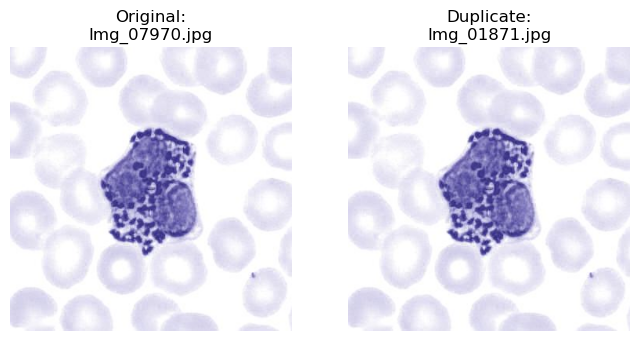

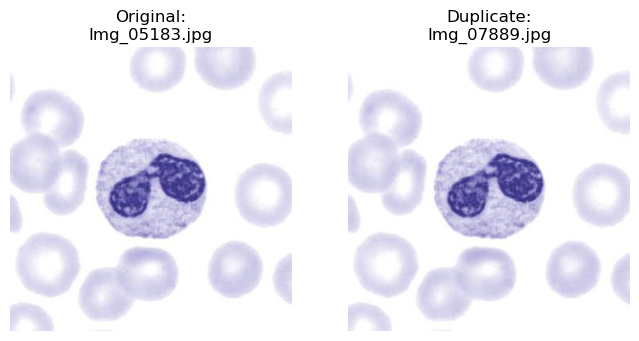

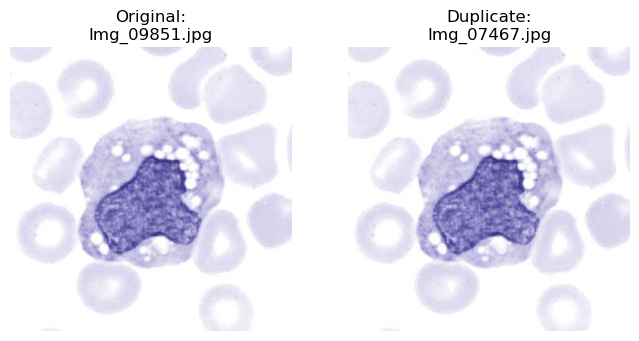

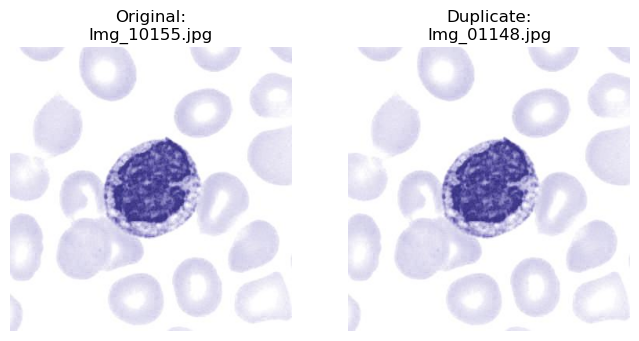

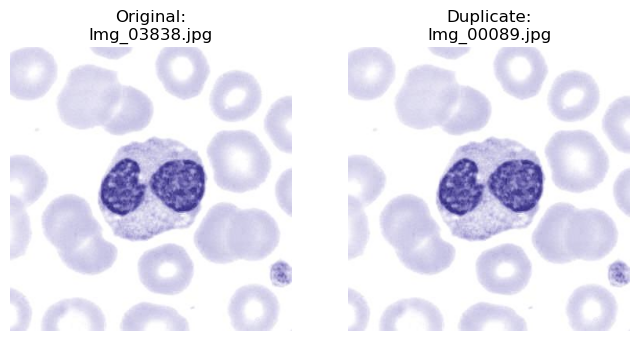

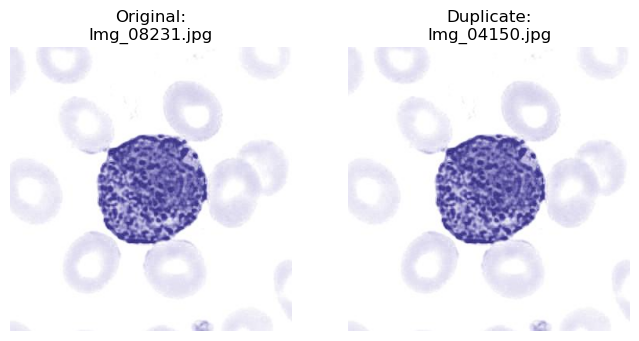

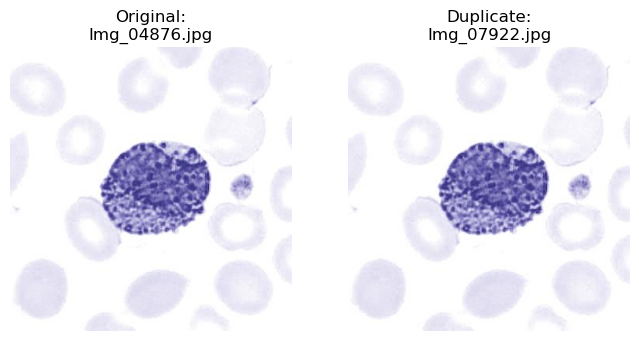

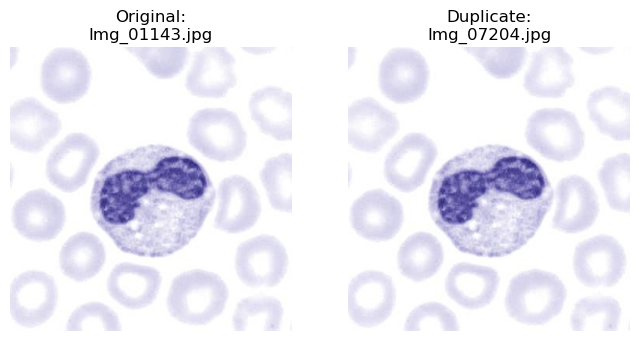

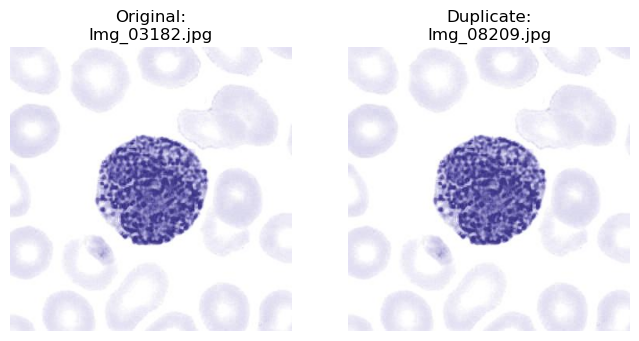

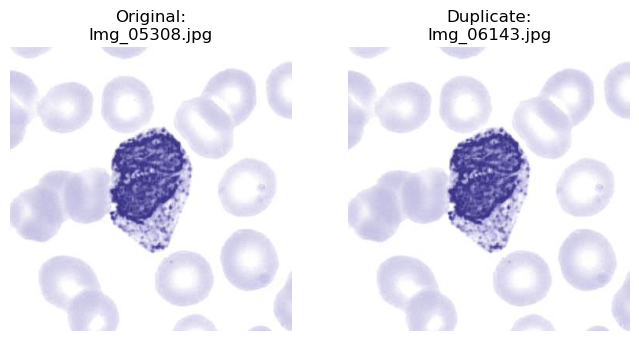

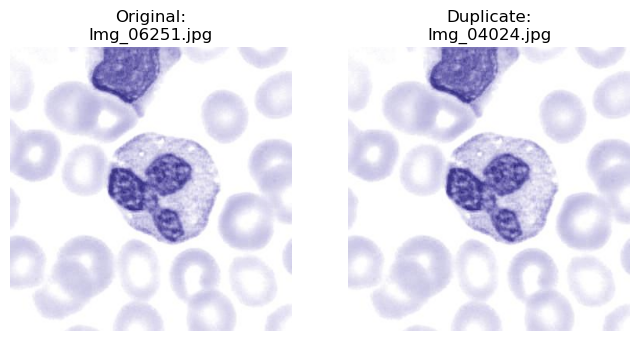

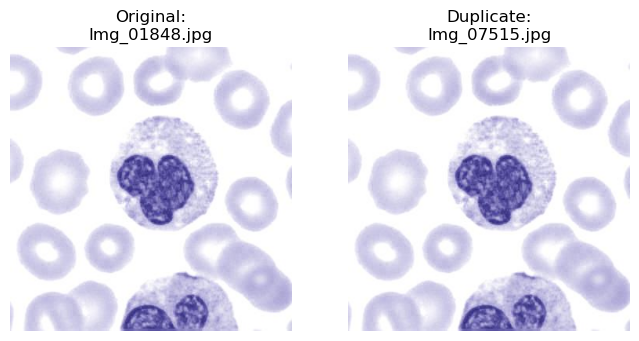

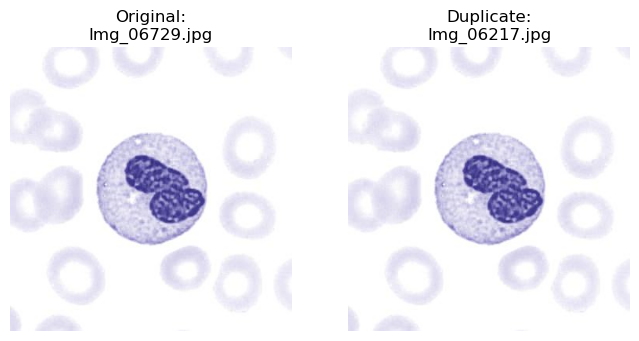

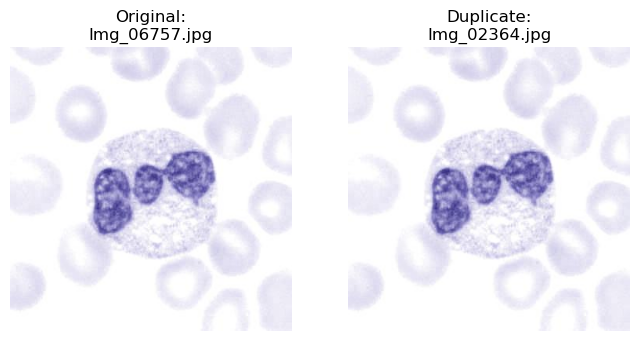

In [50]:
duplicates = find_and_show_duplicate_images(data_dir/"Hematoxylin")


In [51]:
import os
import hashlib

def extract_duplicate_images(directory):
    """
    Scans the given directory for duplicate images by comparing their hashes.
    Returns a list of tuples: (original_image_path, [duplicate_image_path1, duplicate_image_path2, ...])
    """
    hash_dict = {}
    duplicates_dict = {}

    for root, _, files in os.walk(directory):
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                with open(file_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                if file_hash in hash_dict:
                    orig = hash_dict[file_hash]
                    if orig not in duplicates_dict:
                        duplicates_dict[orig] = []
                    duplicates_dict[orig].append(file_path)
                else:
                    hash_dict[file_hash] = file_path
            except Exception as e:
                print(f"Could not process {file_path}: {e}")

    # Convert to list of (original, [duplicates...])
    duplicates_list = [(orig, dups) for orig, dups in duplicates_dict.items()]
    return duplicates_list

In [52]:
duplicates = extract_duplicate_images(data_dir/"Hematoxylin")

In [53]:
print(duplicates)

[('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_07970.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_01871.jpg']), ('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_05183.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_07889.jpg']), ('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_09851.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_07467.jpg']), ('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_10155.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_01148.jpg']), ('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_03838.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_00089.jpg']), ('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_08231.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_04150.jpg']), ('/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_04876.jpg', ['/home/ec2-user/SageMaker/COSC2779-DATA/Hematoxylin/Img_07922.jpg']), ('/home/ec2-user/Sa

In [54]:
dev_data['imageID']

0       Img_00001
1       Img_00002
2       Img_00003
3       Img_00004
4       Img_00005
          ...    
4995    Img_04996
4996    Img_04997
4997    Img_04998
4998    Img_04999
4999    Img_05000
Name: imageID, Length: 5000, dtype: object

In [55]:
dev_data = csv_dict["dev_data_2025.csv"]
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imageID            5000 non-null   object
 1   label              5000 non-null   object
 2   cell_shape         5000 non-null   object
 3   nucleus_shape      5000 non-null   object
 4   cytoplasm_vacuole  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [56]:
import os

def extract_image_id(file_path):
    """Extracts the image ID (e.g., Img_07970) from a file path."""
    return os.path.splitext(os.path.basename(file_path))[0]

# Loop through each (original, [duplicates...]) pair
for orig, dups in duplicates:
    orig_id = extract_image_id(orig)
    # Print the original entry
    orig_row = dev_data[dev_data['imageID'] == orig_id]
    print(f"Original ({orig_id}):")
    print(orig_row)
    # Print each duplicate entry
    for dup in dups:
        dup_id = extract_image_id(dup)
        dup_row = dev_data[dev_data['imageID'] == dup_id]
        print(f"  Duplicate ({dup_id}):")
        print(dup_row)
    print("-" * 40)

Original (Img_07970):
Empty DataFrame
Columns: [imageID, label, cell_shape, nucleus_shape, cytoplasm_vacuole]
Index: []
  Duplicate (Img_01871):
        imageID     label cell_shape      nucleus_shape cytoplasm_vacuole
1870  Img_01871  Basophil  irregular  segmented-bilobed                no
----------------------------------------
Original (Img_05183):
Empty DataFrame
Columns: [imageID, label, cell_shape, nucleus_shape, cytoplasm_vacuole]
Index: []
  Duplicate (Img_07889):
Empty DataFrame
Columns: [imageID, label, cell_shape, nucleus_shape, cytoplasm_vacuole]
Index: []
----------------------------------------
Original (Img_09851):
Empty DataFrame
Columns: [imageID, label, cell_shape, nucleus_shape, cytoplasm_vacuole]
Index: []
  Duplicate (Img_07467):
Empty DataFrame
Columns: [imageID, label, cell_shape, nucleus_shape, cytoplasm_vacuole]
Index: []
----------------------------------------
Original (Img_10155):
Empty DataFrame
Columns: [imageID, label, cell_shape, nucleus_shape, cytopla

In [57]:
dev_data = csv_dict["dev_data_2025.csv"]
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imageID            5000 non-null   object
 1   label              5000 non-null   object
 2   cell_shape         5000 non-null   object
 3   nucleus_shape      5000 non-null   object
 4   cytoplasm_vacuole  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [58]:
dev_data = csv_dict["dev_data_2025.csv"]
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imageID            5000 non-null   object
 1   label              5000 non-null   object
 2   cell_shape         5000 non-null   object
 3   nucleus_shape      5000 non-null   object
 4   cytoplasm_vacuole  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [59]:
dev_data = csv_dict["dev_data_2025.csv"]
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imageID            5000 non-null   object
 1   label              5000 non-null   object
 2   cell_shape         5000 non-null   object
 3   nucleus_shape      5000 non-null   object
 4   cytoplasm_vacuole  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [60]:
import os

def extract_image_id(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

# Build a set of all duplicate image IDs (not originals)
duplicate_ids = set()
for orig, dups in duplicates:
    for dup in dups:
        duplicate_ids.add(extract_image_id(dup))

# Remove rows whose imageID is in the duplicate_ids set
dev_data_no_duplicates = dev_data[~dev_data['imageID'].isin(duplicate_ids)].reset_index(drop=True)

print(dev_data_no_duplicates)

        imageID       label cell_shape         nucleus_shape cytoplasm_vacuole
0     Img_00001  Lymphocyte      round     unsegmented-round                no
1     Img_00002    Monocyte  irregular  unsegmented-indented                no
2     Img_00003    Monocyte  irregular             irregular               yes
3     Img_00004    Basophil      round  segmented-multilobed                no
4     Img_00005  Neutrophil      round      unsegmented-band                no
...         ...         ...        ...                   ...               ...
4989  Img_04996  Lymphocyte  irregular     unsegmented-round                no
4990  Img_04997  Neutrophil      round      unsegmented-band                no
4991  Img_04998    Basophil      round             irregular                no
4992  Img_04999  Neutrophil      round      unsegmented-band                no
4993  Img_05000  Neutrophil      round      unsegmented-band                no

[4994 rows x 5 columns]


In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Apply Label Encoding
le_cell_shape = LabelEncoder()
le_nucleus_shape = LabelEncoder()
le_cytoplasm_vacuole = LabelEncoder()

dev_data_no_duplicates["cell_shape_idx"] = le_cell_shape.fit_transform(dev_data_no_duplicates["cell_shape"])
dev_data_no_duplicates["nucleus_shape_idx"] = le_nucleus_shape.fit_transform(dev_data_no_duplicates["nucleus_shape"])
dev_data_no_duplicates["cytoplasm_vacuole_idx"] = le_cytoplasm_vacuole.fit_transform(dev_data_no_duplicates["cytoplasm_vacuole"])


In [62]:
dev_data_no_duplicates

,imageID,label,cell_shape,nucleus_shape,cytoplasm_vacuole,cell_shape_idx,nucleus_shape_idx,cytoplasm_vacuole_idx
0,Img_00001,Lymphocyte,round,unsegmented-round,no,1,5,0
1,Img_00002,Monocyte,irregular,unsegmented-indented,no,0,4,0
2,Img_00003,Monocyte,irregular,irregular,yes,0,0,1
3,Img_00004,Basophil,round,segmented-multilobed,no,1,2,0
4,Img_00005,Neutrophil,round,unsegmented-band,no,1,3,0
...,...,...,...,...,...,...,...,...
4989,Img_04996,Lymphocyte,irregular,unsegmented-round,no,0,5,0
4990,Img_04997,Neutrophil,round,unsegmented-band,no,1,3,0
4991,Img_04998,Basophil,round,irregular,no,1,0,0
4992,Img_04999,Neutrophil,round,unsegmented-band,no,1,3,0


## Conduct statistical testing

In [63]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi2_test_and_interpret(df, col1, col2, alpha=0.05):
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\n{col1} vs {col2}")
    print(f"Chi2: {chi2:.4f}, p-value: {p:.4g}, dof: {dof}")
    if p < alpha:
        print(f"Result: Statistically significant association (p < {alpha})")
    else:
        print(f"Result: No statistically significant association (p >= {alpha})")

# Example usage:
chi2_test_and_interpret(dev_data_no_duplicates, 'cell_shape_idx', 'nucleus_shape_idx')
chi2_test_and_interpret(dev_data_no_duplicates, 'cell_shape_idx', 'cytoplasm_vacuole_idx')
chi2_test_and_interpret(dev_data_no_duplicates, 'nucleus_shape_idx', 'cytoplasm_vacuole_idx')


cell_shape_idx vs nucleus_shape_idx
Chi2: 354.4752, p-value: 1.903e-74, dof: 5
Result: Statistically significant association (p < 0.05)

cell_shape_idx vs cytoplasm_vacuole_idx
Chi2: 735.4977, p-value: 5.712e-162, dof: 1
Result: Statistically significant association (p < 0.05)

nucleus_shape_idx vs cytoplasm_vacuole_idx
Chi2: 772.9220, p-value: 8.333e-165, dof: 5
Result: Statistically significant association (p < 0.05)


### 📌 Interpretation
These variables are not independent:

Knowing one label gives you strong predictive clues about the others.

Especially strong between nucleus_shape_idx and cytoplasm_vacuole_idx.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from pathlib import Path
from collections import defaultdict

def plot_color_distribution_single_vs_aggregate(dev_data, images_dir, label_column='label'):
    """
    For each category:
    - Display one random image.
    - Compute mean ± std color histograms of the remaining images.
    
    Parameters:
    - dev_data: DataFrame with image IDs and labels
    - images_dir: Directory containing image files
    - label_column: Column with category labels
    """
    categories = dev_data[label_column].unique()
    category_images = defaultdict(list)
    
    for _, row in dev_data.iterrows():
        category_images[row[label_column]].append(row['imageID'])
    
    # Setup plot: 1 row = category, 3 cols: selected image, mean hist, mean ± std hist
    fig, axes = plt.subplots(len(categories), 3, figsize=(15, 4 * len(categories)))
    if len(categories) == 1:
        axes = axes.reshape(1, -1)

    colors = ['red', 'green', 'blue']
    channel_names = ['Red', 'Green', 'Blue']
    
    for i, category in enumerate(categories):
        image_ids = category_images[category]
        
        if not image_ids:
            continue

        # Randomly select one image
        selected_id = random.choice(image_ids)
        remaining_ids = [img_id for img_id in image_ids if img_id != selected_id]

        # --- Plot the selected image ---
        selected_path = Path(images_dir) / f"{selected_id}.jpg"
        if selected_path.exists():
            img = cv2.imread(str(selected_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, 0].imshow(img_rgb)
            axes[i, 0].set_title(f"{category} - Sample: {selected_id}")
            axes[i, 0].axis('off')
        else:
            axes[i, 0].text(0.5, 0.5, 'Image not found', ha='center', va='center')
            axes[i, 0].axis('off')

        # --- Process remaining images ---
        all_histograms = {0: [], 1: [], 2: []}  # BGR channels

        for img_id in remaining_ids:
            img_path = Path(images_dir) / f"{img_id}.jpg"
            if img_path.exists():
                img = cv2.imread(str(img_path))
                for k in range(3):  # B, G, R
                    hist = cv2.calcHist([img], [k], None, [256], [0, 256])
                    all_histograms[k].append(hist.flatten())

        ax_mean = axes[i, 1]
        ax_std = axes[i, 2]
        has_data = False

        for k, color in enumerate(colors):
            if all_histograms[k]:
                mean_hist = np.mean(all_histograms[k], axis=0)
                std_hist = np.std(all_histograms[k], axis=0)

                ax_mean.plot(mean_hist, color=color, label=f'{channel_names[k]} Mean')
                ax_std.plot(mean_hist, color=color, label=f'{channel_names[k]} Mean')
                ax_std.fill_between(range(256), mean_hist - std_hist, mean_hist + std_hist, color=color, alpha=0.3)

                has_data = True

        ax_mean.set_title(f'{category} - Mean Color Dist')
        ax_std.set_title(f'{category} - Mean ± Std Dev')
        for ax in [ax_mean, ax_std]:
            ax.set_xlabel('Pixel Intensity')
            ax.set_ylabel('Frequency')
            ax.grid(True, alpha=0.3)
            if has_data:
                ax.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"\nSummary:")
    for category in categories:
        total = len(category_images[category])
        print(f"{category}: {total} images (1 shown, {total-1} aggregated)")


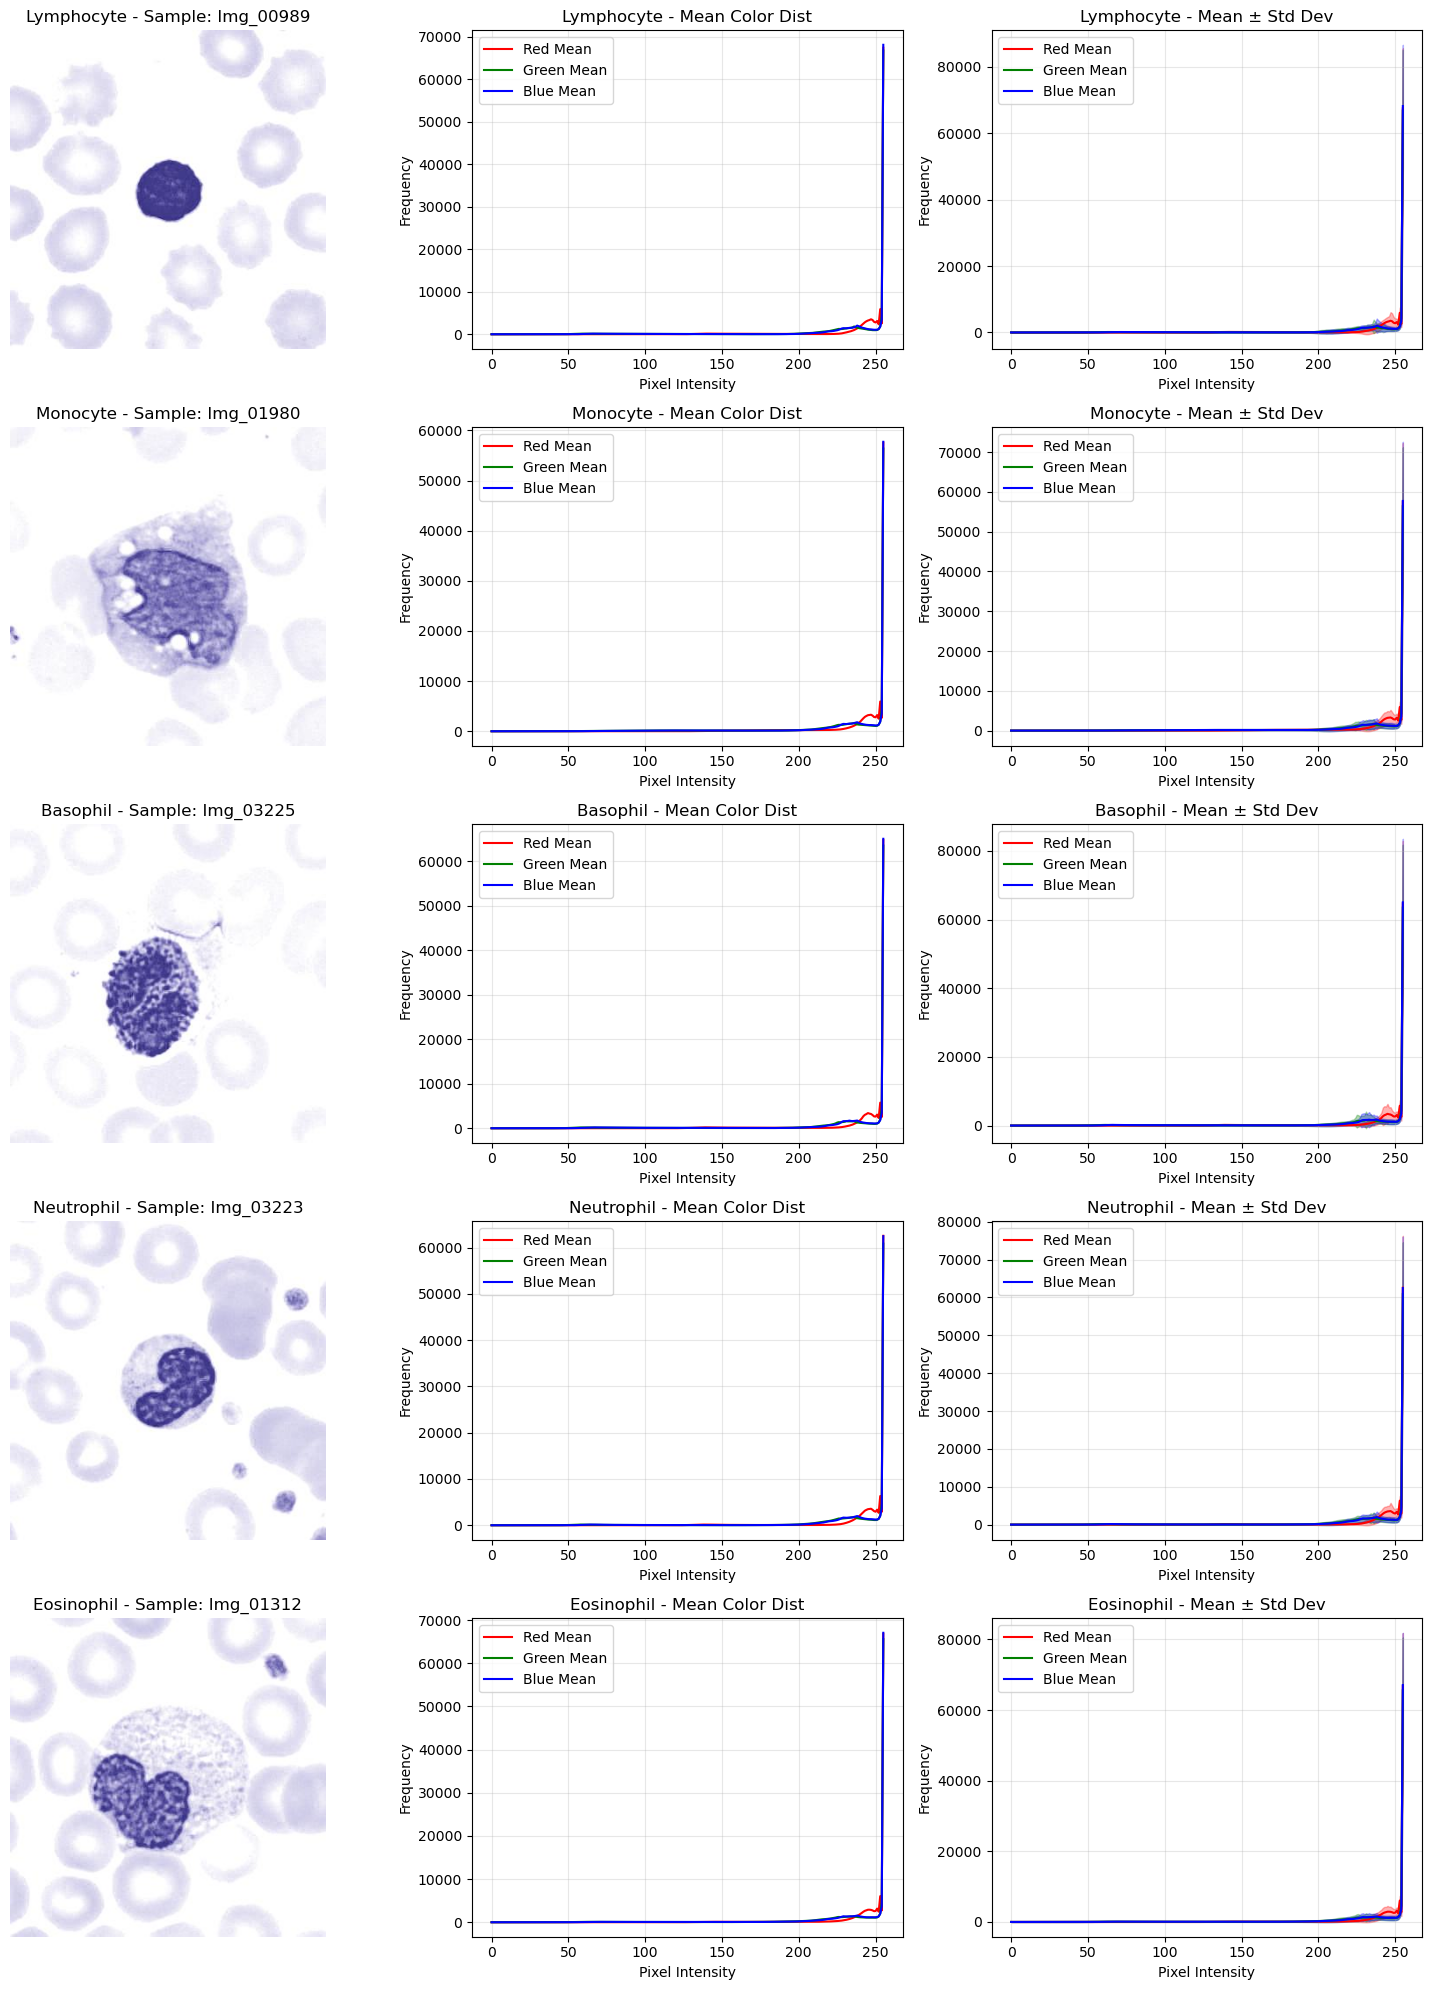


Summary:
Lymphocyte: 579 images (1 shown, 578 aggregated)
Monocyte: 679 images (1 shown, 678 aggregated)
Basophil: 628 images (1 shown, 627 aggregated)
Neutrophil: 1610 images (1 shown, 1609 aggregated)
Eosinophil: 1504 images (1 shown, 1503 aggregated)


In [ ]:
plot_color_distribution_single_vs_aggregate(dev_data, data_dir / "Hematoxylin", 'label')

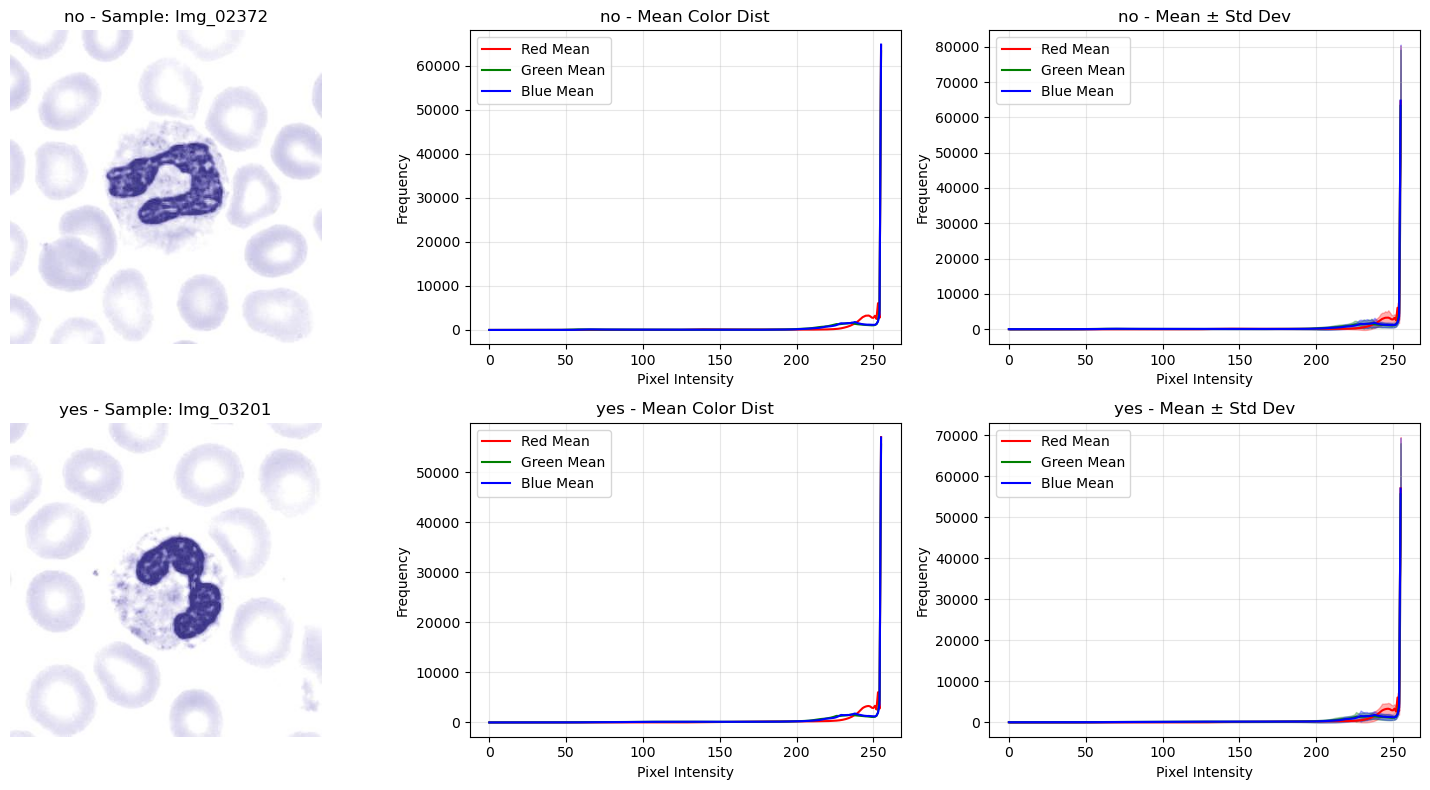


Summary:
no: 4639 images (1 shown, 4638 aggregated)
yes: 361 images (1 shown, 360 aggregated)


In [83]:
plot_color_distribution_single_vs_aggregate(dev_data, data_dir / "Hematoxylin", 'cytoplasm_vacuole')